In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
import kagglehub
import os

# Necessary to have kaggle api token
path = kagglehub.dataset_download("karlorusovan/league-of-legends-soloq-matches-at-10-minutes-2024")

os.mkdir("./data")
os.rename(path + "/match_data_v5.csv", "./data/match_data_v5.csv")

100%|██████████| 979k/979k [00:00<00:00, 1.35MB/s]

Extracting files...


In [55]:
columns = [
    "matchId",
    "blueTeamControlWardsPlaced",
    "blueTeamWardsPlaced",
    "blueTeamTotalKills",
    "blueTeamDragonKills",
    "blueTeamHeraldKills",
    "blueTeamTowersDestroyed",
    "blueTeamInhibitorsDestroyed",
    "blueTeamTurretPlatesDestroyed",
    "blueTeamFirstBlood",
    "blueTeamMinionsKilled",
    "blueTeamJungleMinions",
    "blueTeamTotalGold",
    "blueTeamXp",
    "blueTeamTotalDamageToChamps",
    "redTeamControlWardsPlaced",
    "redTeamWardsPlaced",
    "redTeamTotalKills",
    "redTeamDragonKills",
    "redTeamHeraldKills",
    "redTeamTowersDestroyed",
    "redTeamInhibitorsDestroyed",
    "redTeamTurretPlatesDestroyed",
    "redTeamMinionsKilled",
    "redTeamJungleMinions",
    "redTeamTotalGold",
    "redTeamXp",
    "redTeamTotalDamageToChamps",
    "blueTeamWin",
    "something_else"
]

df = pd.read_csv("./match_data_v5.csv", names=columns, skiprows=1, header=None, index_col=False)
df = df.drop(columns=["something_else"])
df.head()

,matchId,blueTeamControlWardsPlaced,blueTeamWardsPlaced,blueTeamTotalKills,blueTeamDragonKills,blueTeamHeraldKills,blueTeamTowersDestroyed,blueTeamInhibitorsDestroyed,blueTeamTurretPlatesDestroyed,blueTeamFirstBlood,...,redTeamHeraldKills,redTeamTowersDestroyed,redTeamInhibitorsDestroyed,redTeamTurretPlatesDestroyed,redTeamMinionsKilled,redTeamJungleMinions,redTeamTotalGold,redTeamXp,redTeamTotalDamageToChamps,blueTeamWin
0,EUW1_6882489515',2,23,4,2,0,0,0,7,0,...,0,2,0,1,400,94,29637,32613,27239,1
1,EUW1_6882416210',2,46,12,1,0,1,0,10,0,...,0,1,0,4,373,76,28970,30320,36585,0
2,EUW1_6881092720',2,19,13,0,0,0,0,11,0,...,0,2,0,3,340,84,30510,29464,42984,0
3,EUW1_6879405717',3,28,8,0,1,1,0,9,1,...,0,0,0,5,378,87,25157,31069,28229,0
4,EUW1_6879389461',3,30,11,1,1,1,0,7,0,...,0,1,0,5,382,96,26052,29475,19245,1


In [56]:
df.dtypes

matchId                          object
blueTeamControlWardsPlaced        int64
blueTeamWardsPlaced               int64
blueTeamTotalKills                int64
blueTeamDragonKills               int64
blueTeamHeraldKills               int64
blueTeamTowersDestroyed           int64
blueTeamInhibitorsDestroyed       int64
blueTeamTurretPlatesDestroyed     int64
blueTeamFirstBlood                int64
blueTeamMinionsKilled             int64
blueTeamJungleMinions             int64
blueTeamTotalGold                 int64
blueTeamXp                        int64
blueTeamTotalDamageToChamps       int64
redTeamControlWardsPlaced         int64
redTeamWardsPlaced                int64
redTeamTotalKills                 int64
redTeamDragonKills                int64
redTeamHeraldKills                int64
redTeamTowersDestroyed            int64
redTeamInhibitorsDestroyed        int64
redTeamTurretPlatesDestroyed      int64
redTeamMinionsKilled              int64
redTeamJungleMinions              int64


No hay variables en tipo string, pero si que hay variables booleanas.


In [57]:
# Contemos los nulos (no deberían haber)
df.isnull().sum()

matchId                          0
blueTeamControlWardsPlaced       0
blueTeamWardsPlaced              0
blueTeamTotalKills               0
blueTeamDragonKills              0
blueTeamHeraldKills              0
blueTeamTowersDestroyed          0
blueTeamInhibitorsDestroyed      0
blueTeamTurretPlatesDestroyed    0
blueTeamFirstBlood               0
blueTeamMinionsKilled            0
blueTeamJungleMinions            0
blueTeamTotalGold                0
blueTeamXp                       0
blueTeamTotalDamageToChamps      0
redTeamControlWardsPlaced        0
redTeamWardsPlaced               0
redTeamTotalKills                0
redTeamDragonKills               0
redTeamHeraldKills               0
redTeamTowersDestroyed           0
redTeamInhibitorsDestroyed       0
redTeamTurretPlatesDestroyed     0
redTeamMinionsKilled             0
redTeamJungleMinions             0
redTeamTotalGold                 0
redTeamXp                        0
redTeamTotalDamageToChamps       0
blueTeamWin         

In [58]:
df.shape

(24225, 29)

In [59]:
dups = df[df.duplicated()]
print(f"Number of duplicate rows: {len(dups)}")

if len(dups) > 0:
    df = df.drop_duplicates()

df.shape

Number of duplicate rows: 7


(24218, 29)

In [60]:
df = df.drop(columns=["matchId"])

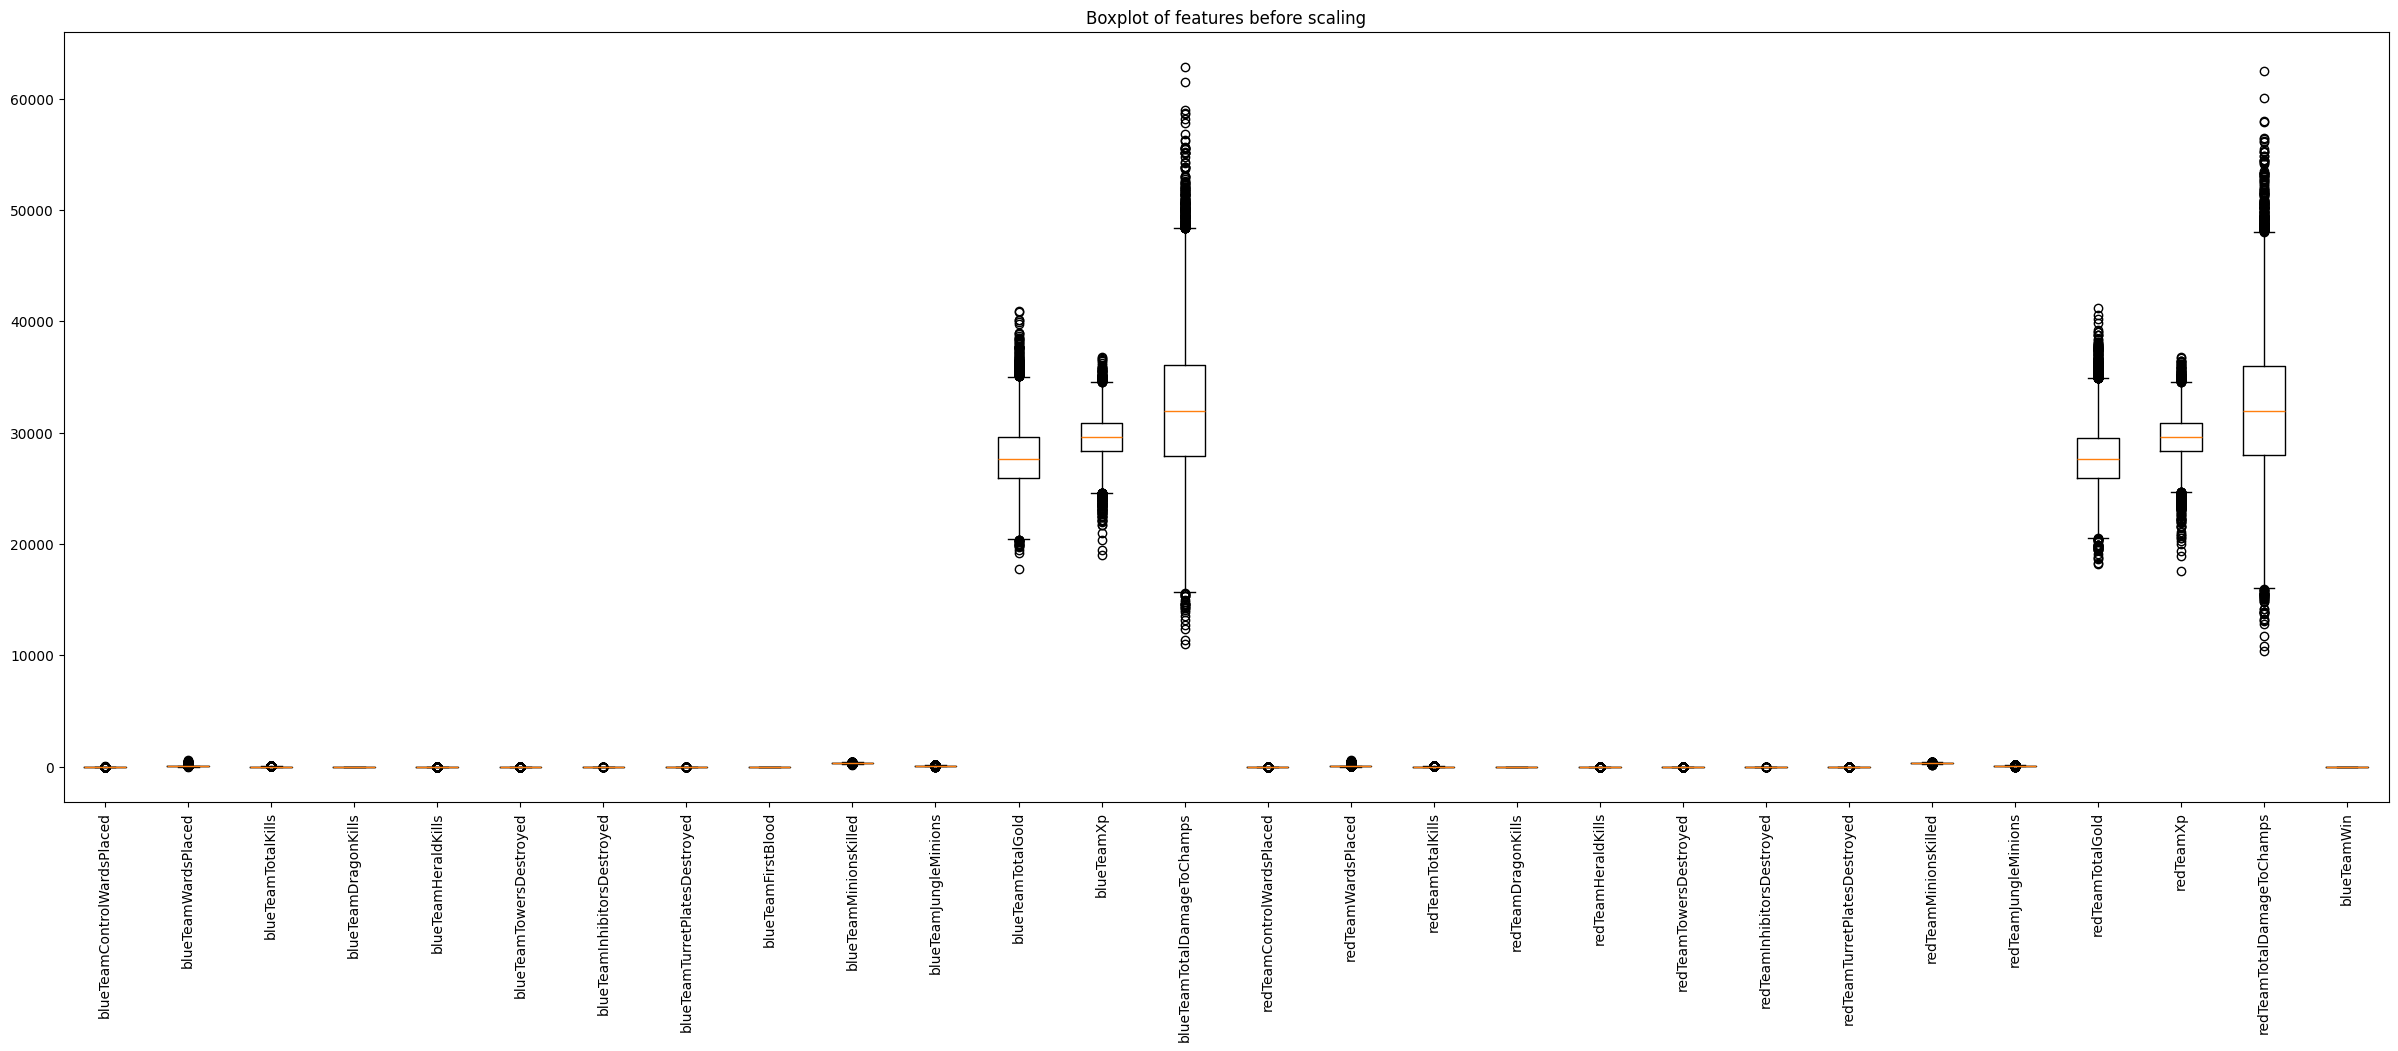

In [44]:
plt.figure(1, figsize=(30, 10))
plt.boxplot(df, tick_labels=df.columns)
plt.title("Boxplot of features before scaling")
plt.xticks(rotation=90)
plt.show()

In [45]:
big_value_cols = [
    "blueTeamTotalGold",
    "blueTeamXp",
    "blueTeamTotalDamageToChamps",
    "redTeamTotalGold",
    "redTeamXp",
    "redTeamTotalDamageToChamps"
]

cols_set = set(df.columns)
small_value_cols = list(cols_set - set(big_value_cols))

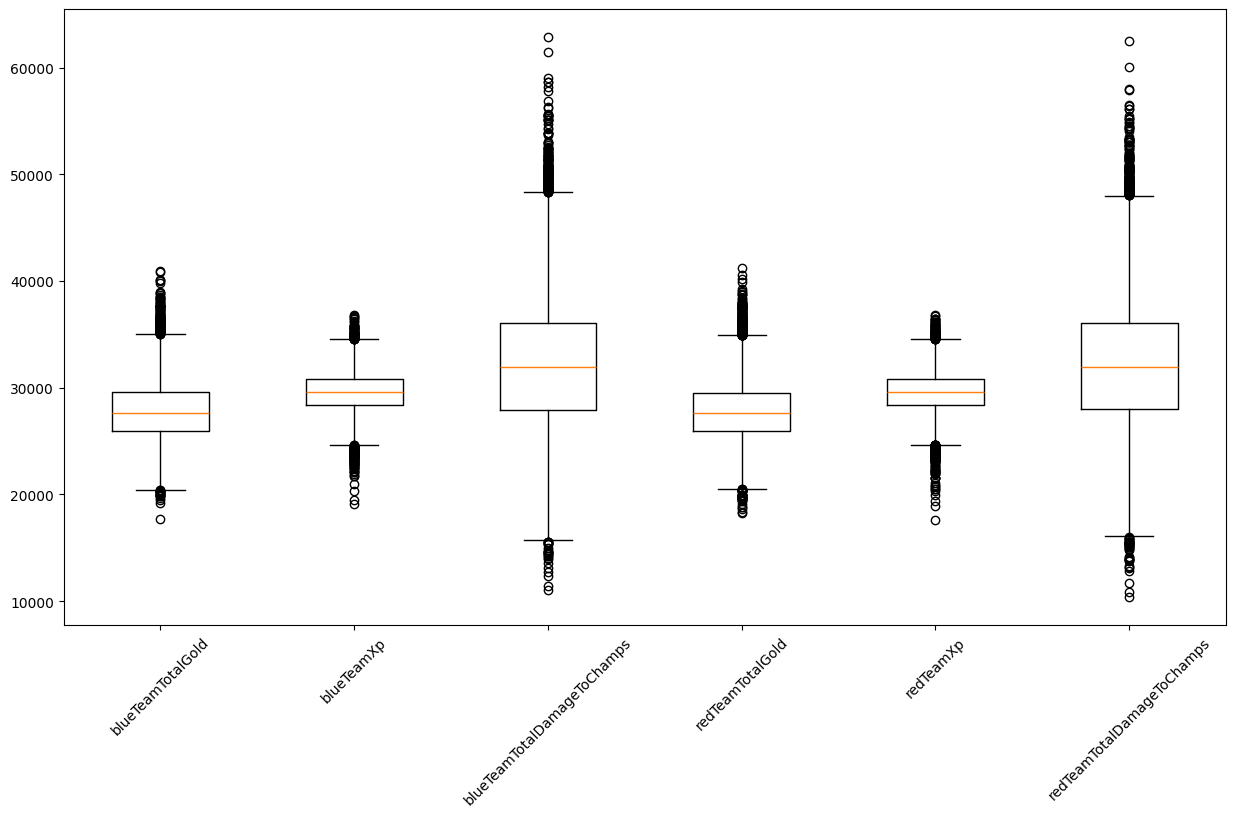

In [47]:
plt.figure(2, figsize=(15, 8))
plt.boxplot(df[big_value_cols], tick_labels=big_value_cols)
plt.xticks(rotation=45)
plt.show()

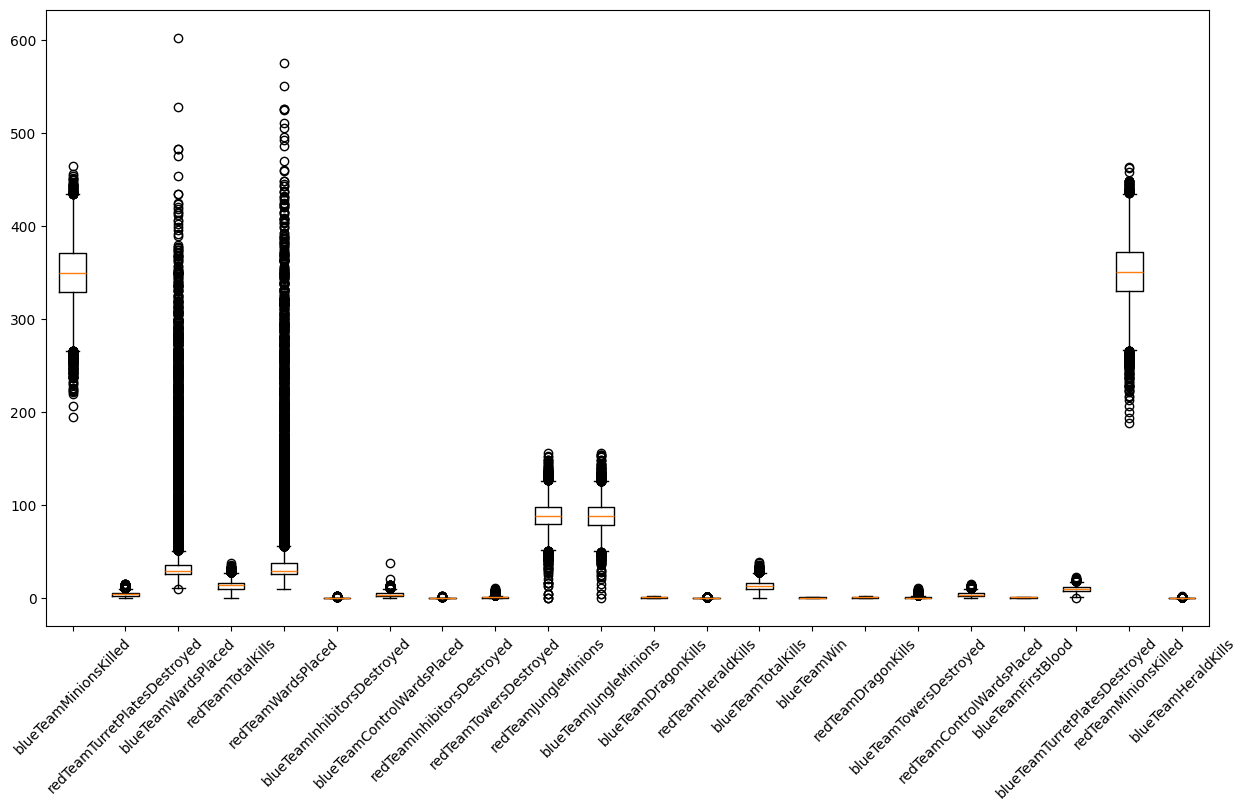

In [48]:
plt.figure(3, figsize=(15, 8))
plt.boxplot(df[small_value_cols], tick_labels=small_value_cols)
plt.xticks(rotation=45)
plt.show()

In [64]:
print(df["blueTeamInhibitorsDestroyed"].value_counts())
print(df["redTeamInhibitorsDestroyed"].value_counts())
print(df["blueTeamHeraldKills"].value_counts())
print(df["redTeamHeraldKills"].value_counts())

blueTeamInhibitorsDestroyed
0    24180
1       27
2       11
Name: count, dtype: int64
redTeamInhibitorsDestroyed
0    24186
1       27
2        5
Name: count, dtype: int64
blueTeamHeraldKills
0    21225
1     2992
2        1
Name: count, dtype: int64
redTeamHeraldKills
0    21720
1     2498
Name: count, dtype: int64


Ahora vamos a transformar estas variables. En una partida de LoL, no es importante el valor absoluto de casi ninguna de las variables, sino la diferencia entre equipos. Por ejemplo, es exactamente igual si el equipo azul tiene 5000 de oro y el rojo 3000, o si el azul tiene 20000 y el rojo 18000. En ambos casos, la diferencia es de 2000, y eso es lo que realmente importa. Por tanto, vamos a transformar las variables para quedarnos con la diferencia entre ambos equipos.  
Además, quitaremos las variables del inhibidores destruidos, ya que casi siempre son 0, y aunque destruir un inhibidor es importante, para los modelos que no sean árboles de decisión aportarán poco.  
Finalmente, quitaremos las variables de las placas de torretas y primera sangre, ya que solo aportan información sobre el oro obtenido, y ya tenemos las variables de oro.

De esta forma hacemos tres cosas:

1. Reducimos dimensionalidad, ya que eliminamos casi la mitad de las variables.
2. Reducimos escala de valores, ya que las diferencias son menores que los valores absolutos, aunque igual hay que escalar.
3. Eliminamos redundancia, ya que las variables de ambos equipos están altamente correlacionadas.


In [65]:
df["goldDiff"] = df["blueTeamTotalGold"] - df["redTeamTotalGold"]
df["xpDiff"] = df["blueTeamXp"] - df["redTeamXp"]
df["damageDiff"] = df["blueTeamTotalDamageToChamps"] - df["redTeamTotalDamageToChamps"]
df["csDiff"] = (df["blueTeamMinionsKilled"] + df["blueTeamJungleMinions"]) - \
    (df["redTeamMinionsKilled"] + df["redTeamJungleMinions"])
df["killsDiff"] = df["blueTeamTotalKills"] - df["redTeamTotalKills"]
df["towersDiff"] = df["blueTeamTowersDestroyed"] - df["redTeamTowersDestroyed"]
df["dragonDiff"] = df["blueTeamDragonKills"] - df["redTeamDragonKills"]
df["controlWardsDiff"] = df["blueTeamControlWardsPlaced"] - df["redTeamControlWardsPlaced"]
df["wardsDiff"] = df["blueTeamWardsPlaced"] - df["redTeamWardsPlaced"]


# Guardar las columnas nuevas en el csv
df.to_csv("./data/matches_with_diffs.csv", index=False)

cols_to_keep = [
    "goldDiff",
    "xpDiff",
    "damageDiff",
    "csDiff",
    "killsDiff",
    "towersDiff",
    "dragonDiff",
    "controlWardsDiff",
    "wardsDiff",
    "blueTeamWin"
]

df_compact = df[cols_to_keep]
df_compact.to_csv("./data/matches_compact.csv", index=False)
df_compact.head()

,goldDiff,xpDiff,damageDiff,csDiff,killsDiff,towersDiff,dragonDiff,controlWardsDiff,wardsDiff,blueTeamWin
0,-5714,-2815,-5397,0,-12,-2,2,-4,-11,1
1,-1118,210,-768,-3,-5,0,1,-4,20,0
2,-2384,37,-4945,3,-5,-2,-1,-1,-222,0
3,2176,-603,3109,-26,-2,1,-1,3,5,0
4,1720,1591,7431,-8,4,0,0,-4,4,1


Utilizaremos el df completo para árboles de decisión y el df_compact para los demás modelos.


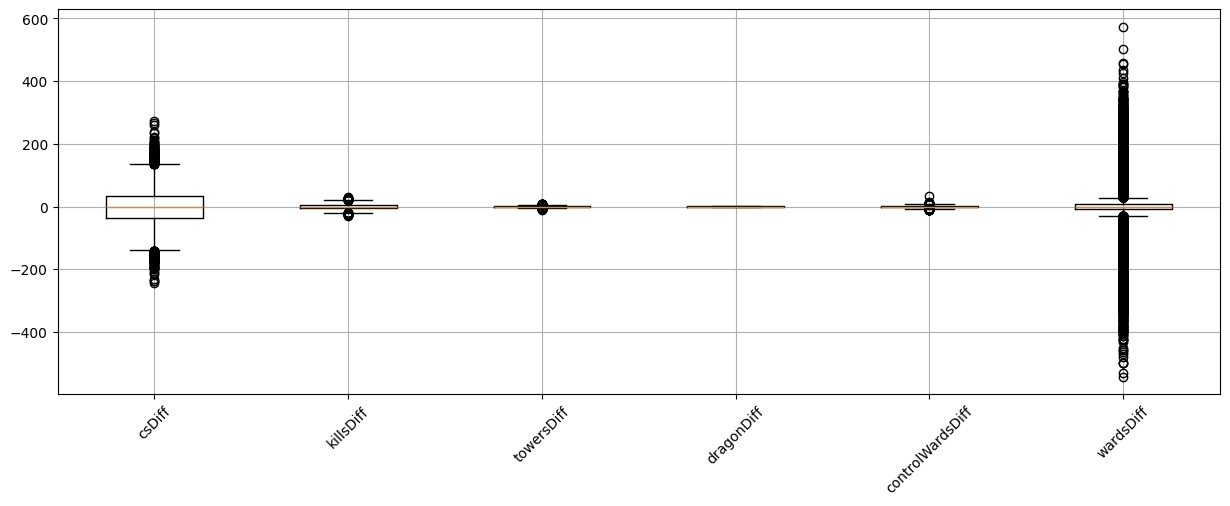

In [71]:
plt.figure(4, figsize=(15, 5))
plt.boxplot(
    df[["csDiff", "killsDiff", "towersDiff", "dragonDiff", "controlWardsDiff", "wardsDiff"]],
    tick_labels=["csDiff", "killsDiff", "towersDiff", "dragonDiff", "controlWardsDiff", "wardsDiff"]
)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Ahora solo queda utilizar los modelos con estos datos. Hay que usar RobustScaler para escalar los datos, pero eso se implementará en el momento de usar los modelos mediante un Pipeline.
